## Desafio - Módulo 1 - Machine Learning

Dataset: https://archive.ics.uci.edu/ml/datasets/Bike+Sharing+Dataset

**Bike Sharing Dataset Data Set**<br>
Description

This dataset contains the hourly and daily count of rental bikes between years 2011 and 2012 in Capital bikeshare system with the corresponding weather and seasonal information.

Attribute Information:

Both hour.csv and day.csv have the following fields, except hr which is not available in day.csv

- instant: record index
- dteday : date
- season : season (1:winter, 2:spring, 3:summer, 4:fall)
- yr : year (0: 2011, 1:2012)
- mnth : month ( 1 to 12)
- hr : hour (0 to 23)
- holiday : weather day is holiday or not (extracted from [Web Link])
- weekday : day of the week
- workingday : if day is neither weekend nor holiday is 1, otherwise is 0.
+ weathersit :
- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
- temp : Normalized temperature in Celsius. The values are derived via (t-t_min)/(t_max-t_min), t_min=-8, t_max=+39 (only in hourly scale)
- atemp: Normalized feeling temperature in Celsius. The values are derived via (t-t_min)/(t_max-t_min), t_min=-16, t_max=+50 (only in hourly scale)
- hum: Normalized humidity. The values are divided to 100 (max)
- windspeed: Normalized wind speed. The values are divided to 67 (max)
- casual: count of casual users
- registered: count of registered users
- cnt: count of total rental bikes including both casual and registered



### Data Exploration & Analysis

Provide data set splits for training, validation, and testing:

In [ ]:
# importando as bibliotecas
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 

In [ ]:
#realizando a leitura do arquivo (dataset)
data = "comp_bikes_mod.csv"
df = pd.read_csv(data)

In [ ]:
print(list(df.columns))

['instant', 'dteday', 'season', 'yr', 'mnth', 'hr', 'holiday', 'weekday', 'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered', 'cnt']


In [ ]:
#apresentando as 5 primeiras linhas do dataset
df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1.0,NaN,1.0,0.0,1.0,0.0,0.0,6.0,0.0,1.0,NaN,0.2879,0.81,0.0,3.0,13.0,16.0
1,2.0,2011-01-01,1.0,0.0,1.0,1.0,0.0,6.0,0.0,NaN,0.22,0.2727,0.80,0.0,8.0,32.0,40.0
2,3.0,2011-01-01,1.0,0.0,1.0,2.0,0.0,6.0,0.0,1.0,0.22,0.2727,0.80,0.0,5.0,27.0,32.0
3,4.0,2011-01-01,1.0,0.0,1.0,3.0,0.0,6.0,0.0,1.0,0.24,0.2879,0.75,0.0,3.0,10.0,13.0
4,5.0,2011-01-01,1.0,0.0,1.0,4.0,0.0,6.0,NaN,1.0,0.24,0.2879,0.75,0.0,0.0,1.0,1.0


#### Pergunta 1
No dataset utilizado para o desafio, quantas instâncias e atributos existem, respectivamente?

* (15,1345)

* (17,17379)

* ***(17379,17)***

* (1345,15)

In [ ]:
df.shape

(17379, 17)

#### Pergunta 2
Quantos tipos diferentes de dados existem no dataset do desafio?

* 17

* 12

* 3

* ***2***

In [ ]:
df.info() #verificando os tipos de variáveis e se existem ou não valores nulos

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     15641 non-null  float64
 1   dteday      15641 non-null  object 
 2   season      15641 non-null  float64
 3   yr          15641 non-null  float64
 4   mnth        15641 non-null  float64
 5   hr          15641 non-null  float64
 6   holiday     15641 non-null  float64
 7   weekday     15641 non-null  float64
 8   workingday  15641 non-null  float64
 9   weathersit  15641 non-null  float64
 10  temp        15641 non-null  float64
 11  atemp       15641 non-null  float64
 12  hum         15641 non-null  float64
 13  windspeed   15641 non-null  float64
 14  casual      15641 non-null  float64
 15  registered  15641 non-null  float64
 16  cnt         15641 non-null  float64
dtypes: float64(16), object(1)
memory usage: 2.3+ MB


**Existem Colunas Com Valores Nulos?**

**Quantas Instâncias e Características Existem no Dataset?**



In [ ]:
#analisando a "estatística" do dataset
df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,15641.000000,15641.000000,15641.000000,15641.000000,15641.000000,15641.000000,15641.000000,15641.000000,15641.000000,15641.000000,15641.000000,15641.000000,15641.000000,15641.000000,15641.000000,15641.000000
mean,8676.513842,2.503420,0.501758,6.536091,11.521258,0.028131,2.999233,0.682118,1.423950,0.497062,0.476281,0.627579,0.189247,35.583147,153.644972,189.919826
std,5010.773755,1.107636,0.500013,3.441490,6.917606,0.165353,2.005300,0.465668,0.638982,0.192451,0.172520,0.192893,0.122188,49.226455,151.750573,181.972508
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4335.000000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8678.000000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.164200,17.000000,115.000000,142.000000
75%,13005.000000,3.000000,1.000000,10.000000,17.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17377.000000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


### Missing Value Analysis

Check any NULL values in data:

In [ ]:
print(df.isnull().any())

instant       True
dteday        True
season        True
yr            True
mnth          True
hr            True
holiday       True
weekday       True
workingday    True
weathersit    True
temp          True
atemp         True
hum           True
windspeed     True
casual        True
registered    True
cnt           True
dtype: bool


In [ ]:
# quantidade de valores faltantes
mis_val = df.isnull().sum()
mis_val

instant       1738
dteday        1738
season        1738
yr            1738
mnth          1738
hr            1738
holiday       1738
weekday       1738
workingday    1738
weathersit    1738
temp          1738
atemp         1738
hum           1738
windspeed     1738
casual        1738
registered    1738
cnt           1738
dtype: int64

#### Pergunta 3
Qual é a proporção (em %) de valores nulos existente na coluna "temp" (temperatura ambiente normalizada)?

* 15%

* ***10%***

* 5%

* 0%

In [ ]:
# quantidade de valores faltantes em porcentagem
mis_val_percent = 100 * df.isnull().sum() / len(df)
mis_val_percent

instant       10.000575
dteday        10.000575
season        10.000575
yr            10.000575
mnth          10.000575
hr            10.000575
holiday       10.000575
weekday       10.000575
workingday    10.000575
weathersit    10.000575
temp          10.000575
atemp         10.000575
hum           10.000575
windspeed     10.000575
casual        10.000575
registered    10.000575
cnt           10.000575
dtype: float64

In [ ]:
df.shape

(17379, 17)

#### Pergunta 4
Após retirar as linhas que contém valores nulos para a coluna "dteday", passamos a contar com quantas instancias e atributos, respectivamente?

* (17,15641)

* (17379,17)

* (17,17379)

* ***(15641,17)***

In [ ]:
len(df['dteday']) - sum(pd.isnull(df['dteday']))

15641

#### Pergunta 5
Considere o dataset após a retirada das linhas que continham valores nulos para a coluna "dteday". Qual é o valor médio para os dados da coluna "temp" (temperatura ambiente normalizada)?

* 0,192

* ***0,496***

* 1,192

* 0,156

In [ ]:
df.dropna(inplace=True)
df.shape

(2881, 17)

In [ ]:
df['temp'].mean()

0.4955570982297817

#### Pergunta 6
Considere o dataset após a retirada das linhas que continham valores nulos para a coluna "dteday". Qual é o desvio padrão para os dados da coluna "windspeed" (velocidade do vento normalizada)?

* ***0,122***

* 0,192

* 1,122

* 0,189

In [ ]:
df['wseasonsez].std()

0.1220592575549915

#### Pergunta 7
Considere o dataset após a retirada das linhas que continham valores nulos para a coluna "dteday". Transforme a coluna "season" em valores categóricos. Quantas categorias diferentes existem?

* ***4***

* 3

* 1

* 2

In [ ]:
df['season'] = pd.Categorical(df['season'])

In [ ]:
df.dtypes

instant        float64
dteday          object
season        category
yr             float64
mnth           float64
hr             float64
holiday        float64
weekday        float64
workingday     float64
weathersit     float64
temp           float64
atemp          float64
hum            float64
windspeed      float64
casual         float64
registered     float64
cnt            float64
dtype: object

In [ ]:
print(df['season'].cat.categories)

Float64Index([1.0, 2.0, 3.0, 4.0], dtype='float64')


#### Pergunta 8
Considere o dataset após a retirada das linhas que continham valores nulos para a coluna "dteday". Transforme a coluna "dteday" no tipo "datetime". Qual é a última data presente no dataset ( YYYY-MM-DD)?

* 2012-01-31

* 2014-12-31

* ***2012-12-31***

* 2012-01-31

In [ ]:
df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
2,3.0,2011-01-01,1.0,0.0,1.0,2.0,0.0,6.0,0.0,1.0,0.22,0.2727,0.80,0.0000,5.0,27.0,32.0
3,4.0,2011-01-01,1.0,0.0,1.0,3.0,0.0,6.0,0.0,1.0,0.24,0.2879,0.75,0.0000,3.0,10.0,13.0
5,6.0,2011-01-01,1.0,0.0,1.0,5.0,0.0,6.0,0.0,2.0,0.24,0.2576,0.75,0.0896,0.0,1.0,1.0
14,15.0,2011-01-01,1.0,0.0,1.0,14.0,0.0,6.0,0.0,2.0,0.46,0.4545,0.72,0.2836,35.0,71.0,106.0
17,18.0,2011-01-01,1.0,0.0,1.0,17.0,0.0,6.0,0.0,2.0,0.44,0.4394,0.82,0.2836,15.0,52.0,67.0


In [ ]:
df.tail()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
17324,17325.0,2012-12-29,1.0,1.0,12.0,17.0,0.0,6.0,0.0,1.0,0.26,0.2424,0.79,0.1045,18.0,100.0,118.0
17336,17337.0,2012-12-30,1.0,1.0,12.0,5.0,0.0,0.0,0.0,2.0,0.26,0.2273,0.48,0.2985,0.0,2.0,2.0
17337,17338.0,2012-12-30,1.0,1.0,12.0,6.0,0.0,0.0,0.0,2.0,0.24,0.1970,0.52,0.4179,1.0,7.0,8.0
17344,17345.0,2012-12-30,1.0,1.0,12.0,13.0,0.0,0.0,0.0,1.0,0.30,0.2576,0.36,0.6567,49.0,120.0,169.0
17355,17356.0,2012-12-31,1.0,1.0,12.0,0.0,0.0,1.0,1.0,1.0,0.18,0.1818,0.55,0.1940,4.0,30.0,34.0


In [ ]:
df[['dteday']] = df[['dteday']].apply(pd.to_datetime)

In [ ]:
df.tail()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
17324,17325.0,2012-12-29,1.0,1.0,12.0,17.0,0.0,6.0,0.0,1.0,0.26,0.2424,0.79,0.1045,18.0,100.0,118.0
17336,17337.0,2012-12-30,1.0,1.0,12.0,5.0,0.0,0.0,0.0,2.0,0.26,0.2273,0.48,0.2985,0.0,2.0,2.0
17337,17338.0,2012-12-30,1.0,1.0,12.0,6.0,0.0,0.0,0.0,2.0,0.24,0.1970,0.52,0.4179,1.0,7.0,8.0
17344,17345.0,2012-12-30,1.0,1.0,12.0,13.0,0.0,0.0,0.0,1.0,0.30,0.2576,0.36,0.6567,49.0,120.0,169.0
17355,17356.0,2012-12-31,1.0,1.0,12.0,0.0,0.0,1.0,1.0,1.0,0.18,0.1818,0.55,0.1940,4.0,30.0,34.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2881 entries, 2 to 17355
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     2881 non-null   float64       
 1   dteday      2881 non-null   datetime64[ns]
 2   season      2881 non-null   category      
 3   yr          2881 non-null   float64       
 4   mnth        2881 non-null   float64       
 5   hr          2881 non-null   float64       
 6   holiday     2881 non-null   float64       
 7   weekday     2881 non-null   float64       
 8   workingday  2881 non-null   float64       
 9   weathersit  2881 non-null   float64       
 10  temp        2881 non-null   float64       
 11  atemp       2881 non-null   float64       
 12  hum         2881 non-null   float64       
 13  windspeed   2881 non-null   float64       
 14  casual      2881 non-null   float64       
 15  registered  2881 non-null   float64       
 16  cnt         2881 non-nu

#### Pergunta 9
Considere o dataset após a retirada das linhas que continham valores nulos para a coluna "dteday". Considerendo o boxplot da variável "windspeed" (velocidade do vento) é CORRETO afirmar?

* ***Existem possíveis outliers, pois existem marcações (pontos) foras dos limites do boxplot.***

* Não existem possíveis outliers, pois existem marcações (pontos) foras dos limites do boxplot.

* Não existem possíveis outliers, pois não existem marcações (pontos) foras dos limites do boxplot.

* Existem possíveis outliers, pois não existem marcações (pontos) foras dos limites do boxplot.

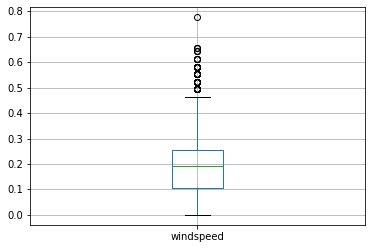

In [ ]:
df.boxplot(column=['windspeed'], return_type='axes')

#### Pergunta 10
Considere o dataset após a retirada das linhas que continham valores nulos para a coluna "dteday". Selecione as colunas "season", "temp", "atemp", "hum", "windspeed". Plot a matriz de correlação. Sobre as variáveis "hum" e "cnt" é CORRETO afirmar:

* Possuem alta correlação linear negativa.

* Possuem alta correlação linear positiva.

* ***Possuem baixa correlação linear negativa.***

* Possuem baixa correlação linear positiva.

**Linear correlation** measures the proximity of the mathematical relationship between variables or dataset features to a linear function. If the relationship between the two features is closer to some linear function, then their linear correlation is stronger and the absolute value of the correlation coefficient is higher.
<br>
The correlation coefficient has values between -1 to 1
* A value closer to 0 implies weaker correlation (exact 0 implying no correlation)
* A value closer to 1 implies stronger positive correlation
* A value closer to -1 implies stronger negative correlation

In [ ]:
print(df[['season', 'temp', 'atemp', 'hum', 'windspeed', 'cnt']].corr())

               temp     atemp       hum  windspeed       cnt
temp       1.000000  0.989701 -0.084060  -0.045575  0.413932
atemp      0.989701  1.000000 -0.068203  -0.082647  0.410328
hum       -0.084060 -0.068203  1.000000  -0.285099 -0.326866
windspeed -0.045575 -0.082647 -0.285099   1.000000  0.093300
cnt        0.413932  0.410328 -0.326866   0.093300  1.000000


In [ ]:
corr_matrix = df[['season', 'temp', 'atemp', 'hum', 'windspeed', 'cnt']].corr()
corr_matrix.style.background_gradient(cmap='coolwarm').set_precision(2)

,temp,atemp,hum,windspeed,cnt
temp,1.00,0.99,-0.08,-0.05,0.41
atemp,0.99,1.00,-0.07,-0.08,0.41
hum,-0.08,-0.07,1.00,-0.29,-0.33
windspeed,-0.05,-0.08,-0.29,1.00,0.09
cnt,0.41,0.41,-0.33,0.09,1.00


In [ ]:
corr_matrix.at['hum', 'cnt']

-0.32686578114445924

#### Pergunta 11
Preencha os valores nulos das colunas "hum","cnt" e "casual" com os valores médios. Utilize as variáveis "hum" e "casual" como independentes e a "cnt" como dependente. Aplique uma regressão linear. Qual o valor de R2? Utilize as entradas como teste.

* -0.80

* 0.80

* -0.40

* ***0.40***


In [ ]:
#realizando a leitura do arquivo (dataset)
import pandas as pd 
data = "comp_bikes_mod.csv"
df = pd.read_csv(data)

In [ ]:
selected_columns = df[['hum', 'cnt', 'casual']]
null_df = selected_columns.copy()
null_df.head()

,hum,cnt,casual
0,0.81,16.0,3.0
1,0.80,40.0,8.0
2,0.80,32.0,5.0
3,0.75,13.0,3.0
4,0.75,1.0,0.0


In [ ]:
#preenchendo os valores médios da coluna
mean_df = null_df.fillna(null_df.mean())
mean_df.head()

,hum,cnt,casual
0,0.81,16.0,3.0
1,0.80,40.0,8.0
2,0.80,32.0,5.0
3,0.75,13.0,3.0
4,0.75,1.0,0.0


In [ ]:
mean_df.shape

(17379, 3)

In [ ]:
mean_df.tail()

,hum,cnt,casual
17374,0.60,119.0,11.000000
17375,0.60,89.0,35.583147
17376,0.60,90.0,7.000000
17377,0.56,61.0,13.000000
17378,0.65,49.0,12.000000


In [ ]:
mean_df.dtypes

hum       float64
cnt       float64
casual    float64
dtype: object

In [ ]:
#como o formato dos dados em cada uma das colunas do dataframe são séries é necessário converter array
dfx = mean_df[["hum", "casual"]].values
dfy = mean_df["cnt"].values

In [ ]:
#utiliza as funções do sklearn para construir a regressão linear
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [ ]:
reg = LinearRegression() #objeto para a regressão linear
x_ModeloSklern = dfx.reshape((-1, 2)) # na regressão linear é necessário que o X seja 2D
regressao = reg.fit (x_ModeloSklern, dfy) # realiza a regressão

In [ ]:
previsao = reg.predict(x_ModeloSklern)

In [ ]:
MSE = mean_squared_error(dfy, previsao) # encontra o MSE através do sklearn
print('MSE: ', MSE)

MSE:  17713.068935231622


In [ ]:
#parâmetros encontrados
print('Y = {}X {}'.format(reg.coef_,reg.intercept_))

from sklearn.metrics import r2_score #método para o cálculo do R2

R_2 = r2_score(dfy, previsao)  #realiza o cálculo do R2

print("Coeficiente de Determinação (R2):", R_2)

Y = [-100.98900093    2.20087962]X 174.98415936102225
Coeficiente de Determinação (R2): 0.40561165206692495


#### Pergunta 12
Utilize os mesmos dados da questão anterior ("hum" e "casual" como variáveis independentes e "cnt" como variavel dependente). Aplique a árvore de decisão como regressão. Qual é o valor aproximado de R2? Utilize as entradas como teste e valores "default".

* 0,40

* 0,30

* ***0,70***

* 1,00

In [ ]:
#como o formato dos dados em cada uma das colunas do dataframe são séries é necessário converter array
X = mean_df[["hum", "casual"]].values
y = mean_df["cnt"].values

In [ ]:
X, y

(array([[ 0.81,  3.  ],
        [ 0.8 ,  8.  ],
        [ 0.8 ,  5.  ],
        ...,
        [ 0.6 ,  7.  ],
        [ 0.56, 13.  ],
        [ 0.65, 12.  ]]), array([16., 40., 32., ..., 90., 61., 49.]))

In [ ]:
from sklearn.metrics import mean_absolute_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split, cross_val_score

In [ ]:
# the model
regressor = DecisionTreeRegressor(random_state=0)
cross_val_score(regressor, X, y, cv=10)

array([-1.21503101, -0.07757739, -0.11925807,  0.11274396, -0.19087971,
       -0.0678078 ,  0.24585495,  0.20704259,  0.23371018,  0.23002566])

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)

In [ ]:
regressor.fit(X,y)
print("R-Squared on train dataset = {}".format(regressor.score(X_test, y_test)))

R-Squared on train dataset = 0.6919004334234703


#### Pergunta 13
Comparando os valores de R2 encontrado com a regressão linear e com a árvore de decisão, é CORRETO afirmar:

* Os valores encontrados pela árvore de decisão como regressor e a regressão linear são próximos.

* ***O valor obtido pela árvore de decisão como regressor apresenta maior R2***

* O valor encontrado pela regressão linear é superior ao encontrado pela árvore de decisão.

* O valor encontrado pela árvore de decisão foi negativo.

In [ ]:
LinearRegression = 0.40561165206692495
DecisionTreeRegressor = 0.6919004334234703

#### Pergunta 14
Comparando o SVM com a árvore de decisão é CORRETO afirmar:

* ***SVM encontra o hiperplano que gera a maior separação entre os dados.***

* SVM e Árvore de Decisão só podem ser utilizados para modelos de classificação.

* Árvore de decisão encontra os hiperplanos de separação do mesmo modo que o SVM.

* Através da Árvore de Decisão não é possível encontrar os limiares de separação entre as classes.

O objetivo de um SVM é encontrar o hiperplano de separação ideal o qual maximiza a margem da base de treinamento.
Um hiperplano é a generalização de um plano.
- com uma dimensão, um hiplerplano é chamado de ponto
- com duas dimensões, é uma linha
- com três dimensões, é um plano
- com mais dimensões você pode chamar de hiperplano


In [ ]:
from sklearn import svm
from sklearn.svm import SVR
from sklearn.metrics import accuracy_score

In [ ]:
svm_clf = svm.SVR(C=0.9, gamma=0.1, kernel='rbf')
svm_clf.fit(X_train, y_train)

SVR(C=0.9, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=0.1,
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [ ]:
# obtém as probabilidades previstas
svm_prob = svm_clf.predict(X_test)
svm_prob

array([178.66607204,  11.03799068, 274.07915413, ...,  17.0136639 ,
       282.57295521,  28.11509355])

In [ ]:
svm_clf.score(X_train, y_train)

0.35770225060674454

#### Pergunta 15
Com base na árvore de decisão é CORRETO afirmar:

* ***Pode ser utilizada para classificação e regressão.***

* A análise de regressão com a árvore de decisão só pode ser realizada com valores categóricos.

* Ávore de Decisão é utilizada apenas para a classificação de dados contínuos.

* Não é possível encontrar os limites de separação entre os conjuntos de dados a partir de uma classificação realizada através da árvore de decisão.